In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [7]:
plt.rcParams['figure.figsize'] = [16, 11]

In [14]:
plz_shape_df = gpd.read_file(r'C:\Users\canda.atalay\Desktop\schoolproject\plz-gebiete.shp', dtype={'plz': str})

plz_shape_df.head()

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


In [18]:
plz_region_df = pd.read_csv(
    r'C:\Users\canda.atalay\Desktop\schoolproject\zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

,plz,geometry,ags,ort,landkreis,bundesland
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5370008,Gangelt,Kreis Heinsberg,Nordrhein-Westfalen
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5370024,Selfkant,Kreis Heinsberg,Nordrhein-Westfalen
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",5154040,Kranenburg,Kreis Kleve,Nordrhein-Westfalen
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5370016,Heinsberg,Kreis Heinsberg,Nordrhein-Westfalen
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5370032,Waldfeucht,Kreis Heinsberg,Nordrhein-Westfalen


In [12]:
berlin_neighbourhoods_df = gpd.read_file(r'C:\Users\canda.atalay\Desktop\schoolproject/neighbourhoods.geojson')

berlin_neighbourhoods_df = berlin_neighbourhoods_df \
    [~ berlin_neighbourhoods_df['neighbourhood_group'].isnull()]

berlin_neighbourhoods_df.head()

,neighbourhood,neighbourhood_group,geometry
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52..."
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52..."
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52..."


In [19]:
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

,plz,geometry,ags,ort,landkreis,bundesland
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5370008,Gangelt,Kreis Heinsberg,Nordrhein-Westfalen
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5370024,Selfkant,Kreis Heinsberg,Nordrhein-Westfalen
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",5154040,Kranenburg,Kreis Kleve,Nordrhein-Westfalen
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5370016,Heinsberg,Kreis Heinsberg,Nordrhein-Westfalen
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5370032,Waldfeucht,Kreis Heinsberg,Nordrhein-Westfalen


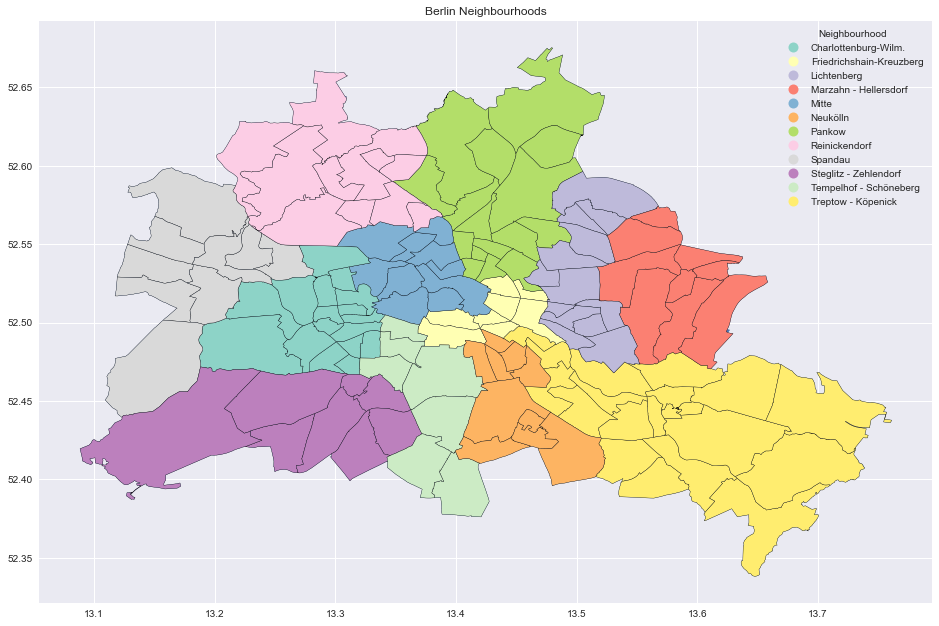

In [36]:
fig, ax = plt.subplots()

berlin_df.plot(
    ax=ax, 
    alpha=1
)

berlin_neighbourhoods_df.plot(
    ax=ax, 
    column='neighbourhood_group',
    categorical=True, 
    legend=True, 
    legend_kwds={'title': 'Neighbourhood', 'loc': 'upper right'},
    cmap='Set3', 
    edgecolor='black'
)

ax.set(
    title='Berlin Neighbourhoods', 
    aspect=1.3
);

In [40]:
import mplleaflet

fig, ax = plt.subplots()

berlin_df.plot(
    ax=ax, 
    alpha=0.2
)

berlin_neighbourhoods_df.plot(
    ax=ax, 
    column='neighbourhood_group',
    categorical=True, 
    cmap='tab20',
)

mplleaflet.display(fig=fig)

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'